In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *

def get_exp_ids(corpus='amazon_grouped-tagged'):
    # curve when varying k
    query_dict = {'expansions__decode_handler': 'SignifierSignifiedFeatureHandler'}
    return Experiment.objects.filter(**query_dict).values_list('id', flat=True)

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


ids are [25, 26, 27, 28, 29, 30, 31, 32, 33]


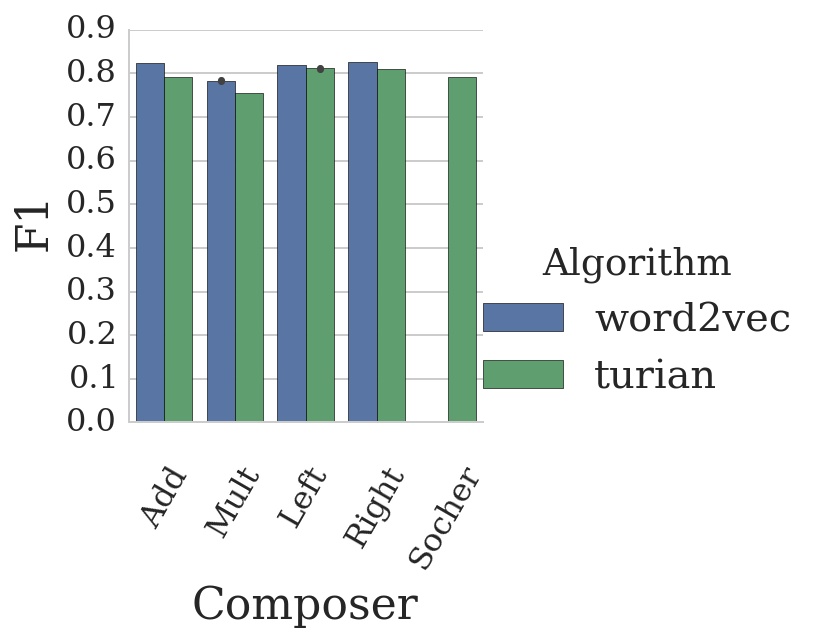

In [3]:
ids = get_exp_ids()
print('ids are', ids)
scores, folds = get_cv_scores_many_experiment(ids)
df = pd.DataFrame({'F1': scores,
                   'Algorithm': get_vectors_field(ids, 'algorithm'),
                   'cvfold': folds,
                   'Composer': get_vectors_field(ids, 'composer')})
grid = sns.factorplot(hue='Algorithm', y='F1', data=df, x='Composer',
                      kind='bar');
grid.set_xticklabels(rotation=60);
plt.savefig('plot-w2v-turian-hybrid.pdf', format='pdf', dpi=300)